<h1>Assignment: Making Maps with Cartopy<h1>

<h2>1) Plot data from NARR<h2>

NARR is NCEP’s North American Regional Reanalysis, a widely used product for studying the weather and climate of the continental US. The data is available from NOAA’s Earth System Research Laboratory via OPeNDAP, meaing that xarray can open the data “remotely” without downloading a file.

In [3]:
import xarray as xr 
from matplotlib import pyplot as plt 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [4]:
#geopotential height file
url = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc'
geods = xr.open_dataset(url, drop_variables=['time_bnds'])
geods

C:\Users\panda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xarray\conventions.py:448: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:            (time: 31, level: 29, y: 277, x: 349)
Coordinates:
  * time               (time) datetime64[ns] 2018-10-01 ... 2018-10-31
  * level              (level) float32 1e+03 975.0 950.0 ... 150.0 125.0 100.0
  * y                  (y) float32 0.0 3.246e+04 ... 8.927e+06 8.96e+06
  * x                  (x) float32 0.0 3.246e+04 ... 1.126e+07 1.13e+07
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Data variables:
    Lambert_Conformal  int32 ...
    hgt                (time, level, y, x) float32 ...
Attributes: (12/17)
    _NCProperties:                   version=1|netcdflibversion=4.4.1.1|hdf5l...
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    ...                              ...
    title:                           Daily NARR
    history:                         created Sat Mar 26 07:07:59 MDT 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
#precipitation file 
url2 = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc'
precipds = xr.open_dataset(url2, drop_variables=['time_bnds'])
precipds

C:\Users\panda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xarray\conventions.py:448: SerializationWarning: variable 'apcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:            (time: 365, y: 277, x: 349)
Coordinates:
  * time               (time) datetime64[ns] 2018-01-01 ... 2018-12-31
  * y                  (y) float32 0.0 3.246e+04 ... 8.927e+06 8.96e+06
  * x                  (x) float32 0.0 3.246e+04 ... 1.126e+07 1.13e+07
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Data variables:
    Lambert_Conformal  int32 ...
    apcp               (time, y, x) float32 ...
Attributes: (12/17)
    _NCProperties:                   version=1|netcdflibversion=4.4.1.1|hdf5l...
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    ...                              ...
    title:                           Daily NARR
    history:                         created Sat Mar 26 04:56:06 MDT 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    DODS_EXTRA.Unlimited_Dimension:  time

Your goal is to make a map that looks like the one below. It shows total precipitation on Oct. 15, 2018 in blue, plus contours of the 500 mb geopotential surface. Hint: examine the dataset variables and attirbutes carefully in order to determine the projection of the data.

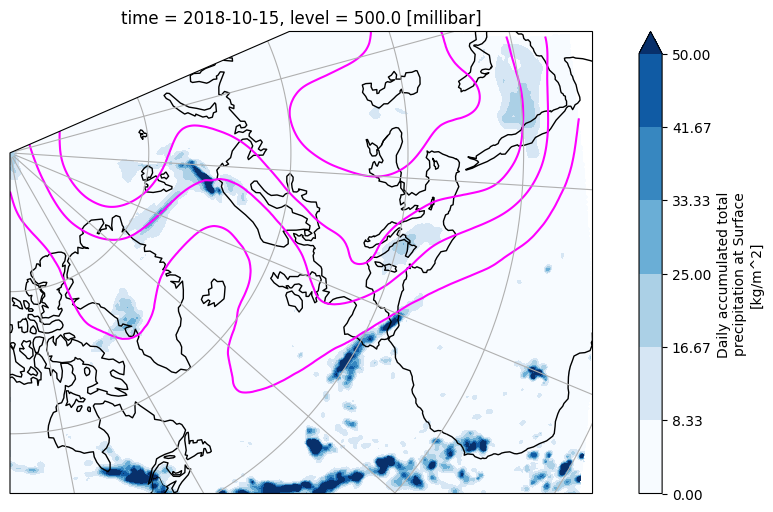

In [159]:
#make the base map of the US states
#can't combine lat and lon corners
#can't set x and y limit with the lat_corners/lon_corners values
#Lambert_Conformal use from data variables?
center_lat = 50.0
center_lon = -107.0
lat_corners = [ 1.000001,  0.897945, 46.3544,   46.63433 ]
lon_corners = [-145.5, -68.32005, -2.569891,  148.6418  ]
extent = [-145.5, 148.6418, -1.000001, 146.63433]


#mapping
plt.figure(figsize = (12,6))
projection = ccrs.LambertConformal(center_lon, center_lat)
ax = plt.axes(projection = projection) 

# ax.set_extent(extent, ccrs.PlateCarree()) #problem: i just can't set a right extent
ax.add_feature(cartopy.feature.STATES, linewidth = 0.5, edgecolor='black')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
ax.gridlines()

#show precipitation on Oct. 15, 2018 and contours of 500 mb geopotential surface
precip_2018 = precipds.apcp.sel(time = '2018-10-15')
clevels = np.arange(0,50,10) #how do i space it out better
precip_plot = precip_2018.plot.contourf(vmax = 50, cmap = 'Blues')

geo_lvl = geods.hgt.sel(time = '2018-10-15', level = 500)
geo_lvl.plot.contour(colors = "magenta")

#i dont know how to add the numbers in between the lines and set an extent
#the colorbar is funky but o well (how do i change this)

<h2>2) Antarctic Sea Ice<h2>

Download this file and then use it to plot the concentration of Antarctic Sea Ice on Aug. 7, 2017. Again, you will need to explore the file contents in order to determine the correct projection.

In [2]:
import xarray as xr
import pooch
url = 'https://polarwatch.noaa.gov/erddap/files/nsidcCDRiceSQsh1day/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc'
fname = pooch.retrieve(url, known_hash='19b74e7e97f1c0786da0c674c4d5e4af0da5b32e2fe8c66a8f1a8a9a1241e73c')
ds_ice = xr.open_dataset(fname, drop_variables='melt_onset_day_seaice_conc_cdr')
ds_ice

<xarray.Dataset>
Dimensions:                     (time: 1, ygrid: 332, xgrid: 316)
Coordinates:
  * time                        (time) datetime64[ns] 2017-08-07T12:00:00
  * ygrid                       (ygrid) float32 4.338e+06 ... -3.938e+06
  * xgrid                       (xgrid) float32 -3.938e+06 ... 3.938e+06
    latitude                    (ygrid, xgrid) float64 ...
    longitude                   (ygrid, xgrid) float64 ...
Data variables:
    projection                  |S1 ...
    seaice_conc_cdr             (time, ygrid, xgrid) float32 ...
    stdev_of_seaice_conc_cdr    (time, ygrid, xgrid) float32 ...
    qa_of_seaice_conc_cdr       (time, ygrid, xgrid) float32 ...
    goddard_merged_seaice_conc  (time, ygrid, xgrid) float32 ...
    goddard_nt_seaice_conc      (time, ygrid, xgrid) float32 ...
    goddard_bt_seaice_conc      (time, ygrid, xgrid) float32 ...
Attributes: (12/70)
    references:                             Comiso, J. C., and F. Nishio. 200...
    program:                                NOAA Climate Data Record Program
    cdr_variable:                           seaice_conc_cdr
    software_version_id:                    git@bitbucket.org:nsidc/seaice_cd...
    Metadata_Link:                          https://nsidc.org/api/dataset/met...
    product_version:                        v03r01
    ...                                     ...
    scaling_factor:                         1.0
    false_easting:                          0.0
    false_northing:                         0.0
    semimajor_radius:                       6378273.0
    semiminor_radius:                       6356889.449
    proj_units:                             meters

In [118]:
ds_ice.projection

<xarray.DataArray 'projection' ()>
[1 values with dtype=|S1]
Attributes: (12/23)
    grid_boundary_top_projected_y:          4350000.0
    grid_boundary_bottom_projected_y:       -3950000.0
    grid_boundary_right_projected_x:        3950000.0
    grid_boundary_left_projected_x:         -3950000.0
    parent_grid_cell_row_subset_start:      0.0
    parent_grid_cell_row_subset_end:        332.0
    ...                                     ...
    scaling_factor:                         1.0
    false_easting:                          0.0
    false_northing:                         0.0
    semimajor_radius:                       6378273.0
    semiminor_radius:                       6356889.449
    units:                                  meters

In [21]:
ds_ice.seaice_conc_cdr

<xarray.DataArray 'seaice_conc_cdr' (time: 1, ygrid: 332, xgrid: 316)>
[104912 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2017-08-07T12:00:00
  * ygrid      (ygrid) float32 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
  * xgrid      (xgrid) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06
    latitude   (ygrid, xgrid) float64 -39.36 -39.49 -39.62 ... -41.72 -41.58
    longitude  (ygrid, xgrid) float64 -42.23 -42.05 -41.87 ... 135.4 135.2 135.0
Attributes: (12/13)
    valid_range:            [  0 100]
    long_name:              NOAA/NSIDC Climate Data Record of Passive Microwa...
    standard_name:          sea_ice_area_fraction
    units:                  1
    flag_values:            [-5 -4 -3 -2 -1]
    flag_meanings:          pole_hole lakes coastal land_mask missing_data
    ...                     ...
    grid_mapping:           projection
    reference:              https://nsidc.org/api/dataset/metadata/v2/oai?ver...
    ancillary_variables:    stdev_of_seaice_conc_cdr qa_of_seaice_conc_cdr
    cell_methods:           time: mean (interval: 1 day)
    coverage_content_type:  physicalMeasurement
    ioos_category:          Ice Distribution

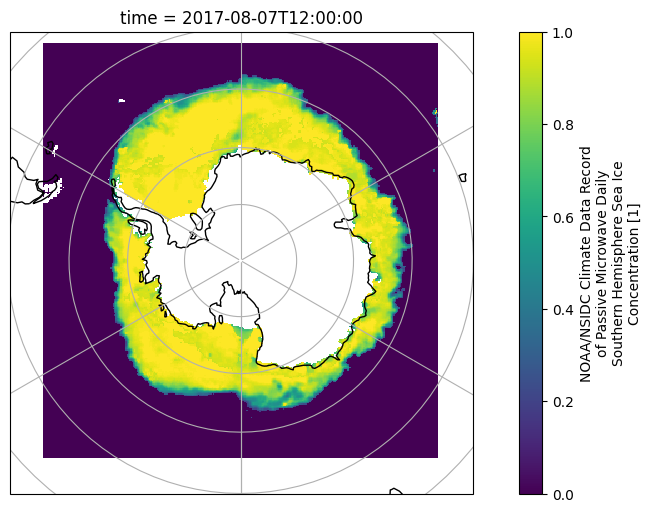

In [25]:
#projected grid bottom/top/left/right from projectionn too large to use
extent = [-180, 180,-90,-50]

plt.figure(figsize = (12,6))

#antarctic is south 
projection = ccrs.SouthPolarStereo()
ax = plt.axes(projection = projection) 
#need to zoom in on the antarctic
ax.set_extent(extent, ccrs.PlateCarree())
# ax.add_feature(cartopy.feature.)
ax.coastlines()
ax.gridlines()

#plot the concentration of Antarctic Sea Ice on Aug. 7, 2017
ice_conc = ds_ice.seaice_conc_cdr.sel(time = '2017-08-07')
ice_conc
#need to mask using boolean indexing so that the land concentration doesn't show
ice_conc_masked = ice_conc.where(ice_conc <= 1) 


#need to make scale 0 to 1 for colorbar
#need to disregard land 
#not filling the purple all the way


# img = ax.pcolormesh(
    # ice_conc_masked.longitude, ice_conc_masked.latitude, ice_conc_masked.squeeze(),
    # transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=1)

map = ice_conc_masked.plot()
#does the same thing as code above but just can't adjust the colorbar to diff size hmm
#still need to fill the rest of the map in but it's ok ig


<h2>3) Global USGS Earthquakes<h2>

Reload the file we explored in homework 5 using pandas and use the data to recreate this map.

In [30]:
url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
#do we use pandas or xarray to open this
#hopefully we can use pandas to perform on cartopy
import pandas as pd 
earthquake_df = pd.read_csv(url)
earthquake_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [45]:
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


In [46]:
#top 50 earthquakes of 2014
#need to recognize time as a date time value
earthquake_df = pd.read_csv(url, parse_dates = [0])
earthquake_df["year"] = earthquake_df["time"].dt.year
earthquake_df_2014 = earthquake_df[earthquake_df['year'] == 2014]
top_50 = earthquake_df_2014.nlargest(50, "mag")
top_50.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,year
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake,2014
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake,2014
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake,2014
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake,2014
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake,2014


Text(0.5, 1.0, 'Top 50 Earthquakes in 2014')

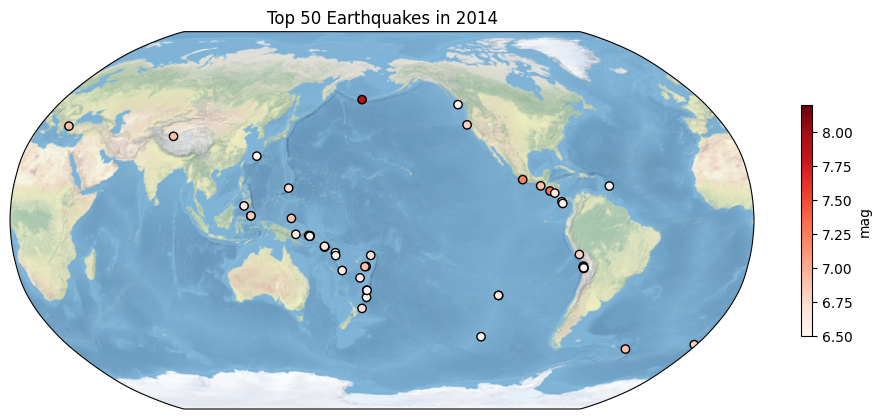

In [54]:
#setting up proper projection
plt.figure(figsize = (12,6))
projection = ccrs.Robinson(central_longitude=-170) #adjusted longitude to focus on Pacific Ocean
ax = plt.axes(projection = projection)
ax.stock_img()

#need to add the top 50 in markers
#colorcode according to magnitude 
longitude = np.array(top_50["longitude"])
latitude = np.array(top_50["latitude"])
values = np.array(top_50["mag"])

#adding markers
scat_plot = ax.scatter(longitude, latitude, c = values, cmap = 'Reds', edgecolor = 'black', linewidth = 1, transform = ccrs.PlateCarree())
plt.colorbar(scat_plot, shrink = 0.5, label = 'mag')
plt.title("Top 50 Earthquakes in 2014")

NOTE: only the first map needs to be centered, but other than that I think it's fairly close